In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



In [67]:
df=pd.read_csv('depression.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [68]:
df.shape

(27901, 18)

In [69]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [70]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [71]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [72]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [73]:
df.isna().sum()

id                                         0
Gender                                     0
Age                                      150
City                                       0
Profession                                 0
Academic Pressure                          0
Work Pressure                              0
CGPA                                     150
Study Satisfaction                         0
Job Satisfaction                           0
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                         150
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
dtype: int64

In [74]:
df1=df['Depression'].value_counts()
df1

Depression
1    16336
0    11565
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x18cb79789e0>,
 [Text(1, 0, '1'), Text(0, 0, '0')])

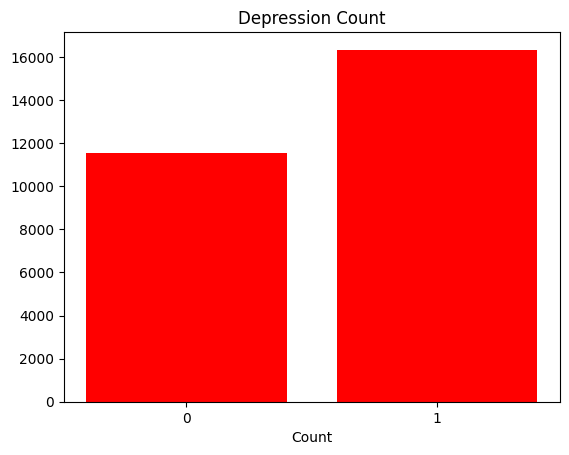

In [75]:
plt.bar(df1.index,df1.values,color='r')
plt.xlabel('Depression')
plt.xlabel('Count')
plt.title('Depression Count')
plt.xticks([1,0])

In [76]:
df['Age']=df['Age'].fillna(df['Age'].median())
df.isna().sum()

id                                         0
Gender                                     0
Age                                        0
City                                       0
Profession                                 0
Academic Pressure                          0
Work Pressure                              0
CGPA                                     150
Study Satisfaction                         0
Job Satisfaction                           0
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                         150
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
dtype: int64

In [77]:
df['CGPA']=df['CGPA'].fillna(df['CGPA'].mean())
df.isna().sum()

id                                         0
Gender                                     0
Age                                        0
City                                       0
Profession                                 0
Academic Pressure                          0
Work Pressure                              0
CGPA                                       0
Study Satisfaction                         0
Job Satisfaction                           0
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                         150
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
dtype: int64

In [78]:
df['Work/Study Hours']=df['Work/Study Hours'].fillna(df['Work/Study Hours'].mode()[0])
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [79]:
df[["Gender","Depression"]].groupby(['Gender'],as_index=False).mean().sort_values(by='Depression',ascending=False)

,Gender,Depression
1,Male,0.586287
0,Female,0.584507


In [80]:
df[["City","Depression"]].groupby(['City'],as_index=False).mean().sort_values(by='Depression',ascending=False)

,City,Depression
2,3.0,1.000000
14,Harsh,1.000000
12,Gaurav,1.000000
6,Bhavna,1.000000
31,Mira,1.000000
47,Vaanya,1.000000
43,Saanvi,1.000000
34,Nalini,1.000000
26,M.Com,1.000000
30,Mihir,1.000000


In [81]:
df[["Profession","Depression"]].groupby(['Profession'],as_index=False).mean().sort_values(by='Depression',ascending=False)

,Profession,Depression
0,'Civil Engineer',1.000000
1,'Content Writer',1.000000
3,'Educational Consultant',1.000000
4,'UX/UI Designer',1.000000
7,Doctor,1.000000
6,Chef,1.000000
10,Manager,1.000000
11,Pharmacist,1.000000
8,Entrepreneur,1.000000
9,Lawyer,1.000000


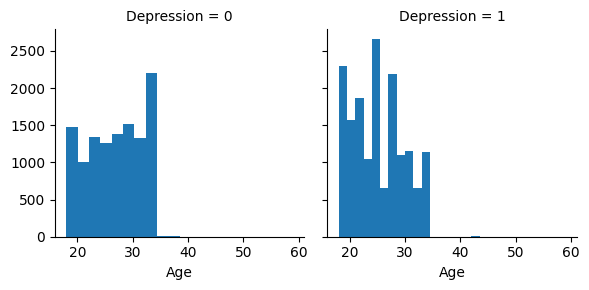

In [82]:
g=sns.FacetGrid(df,col='Depression')
g.map(plt.hist,'Age',bins=20)

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x0000018CB797B110>>

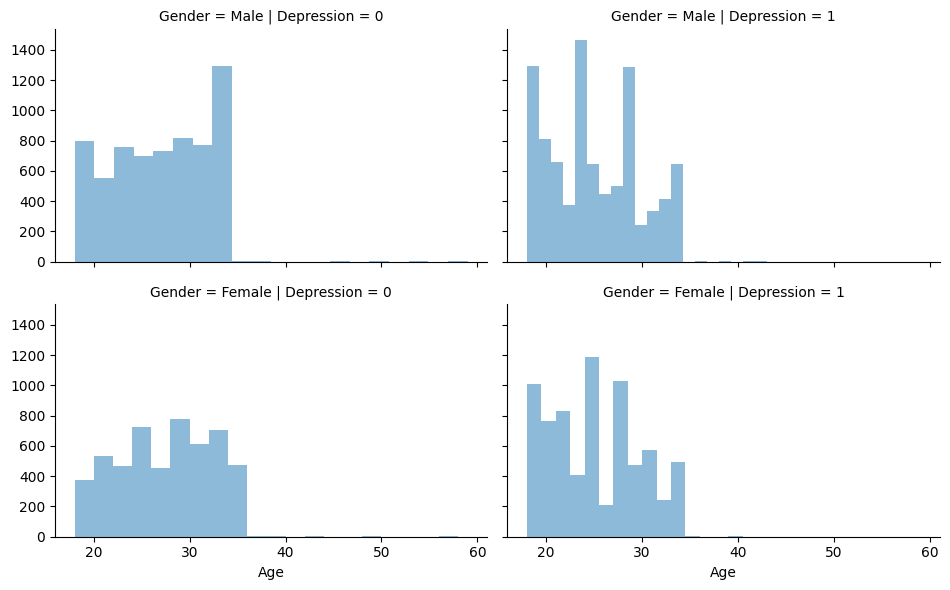

In [83]:
grid=sns.FacetGrid(df,col='Depression',row='Gender',aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend

In [84]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Text(0.5, 1.0, 'Have you ever had suicidal thoughts ?')

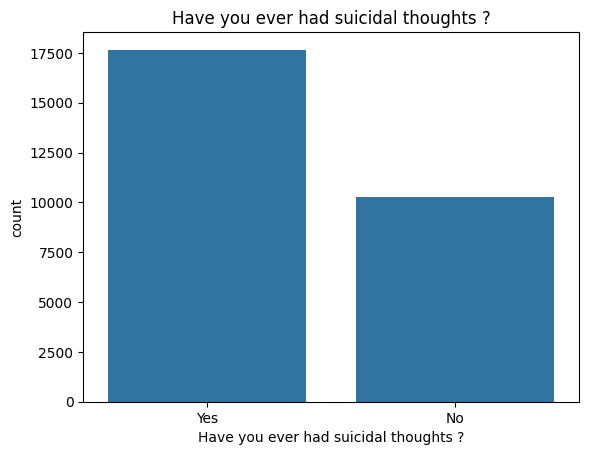

In [ ]:
sns.countplot(x='Have you ever had suicidal thoughts ?',data=df)
plt.title('Suicidal Thoughts count')

Text(0.5, 1.0, 'Financial Stress')

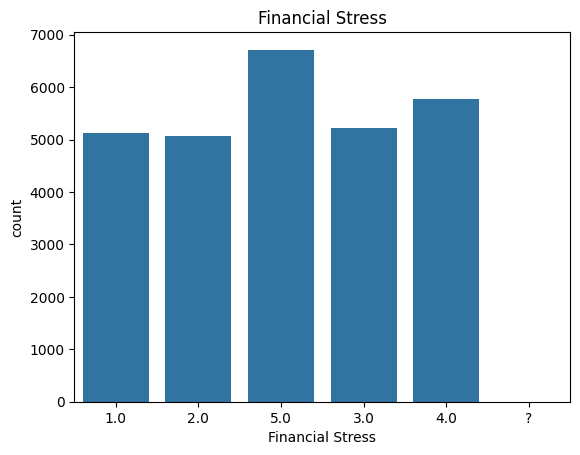

In [102]:
sns.countplot(x='Financial Stress',data=df)
plt.title('Financial Stress')

Text(0.5, 1.0, 'Family History of Mental Illness Count')

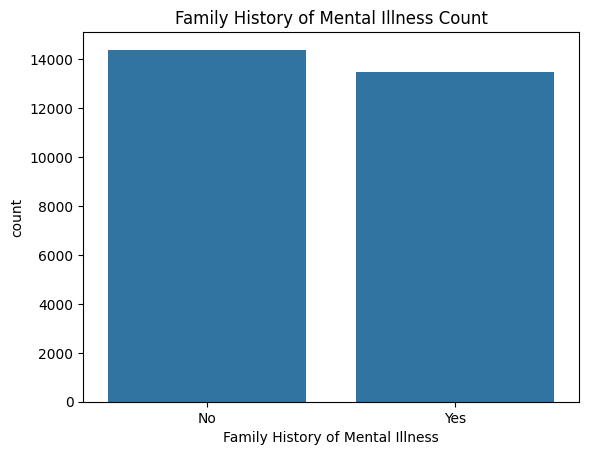

In [101]:
sns.countplot(x='Family History of Mental Illness',data=df)
plt.title('Family History of Mental Illness Count')

Text(0.5, 1.0, 'Dietary Habits Count')

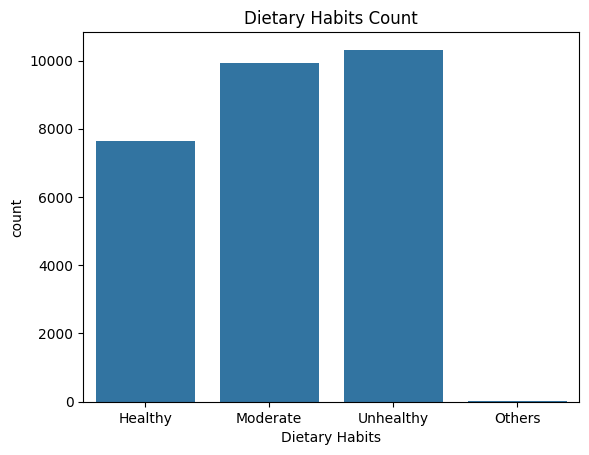

In [ ]:
sns.countplot(x='Dietary Habits',data=df)
plt.title('Dietary Habits Count')

Text(0.5, 1.0, 'Sleeping Hour connection')

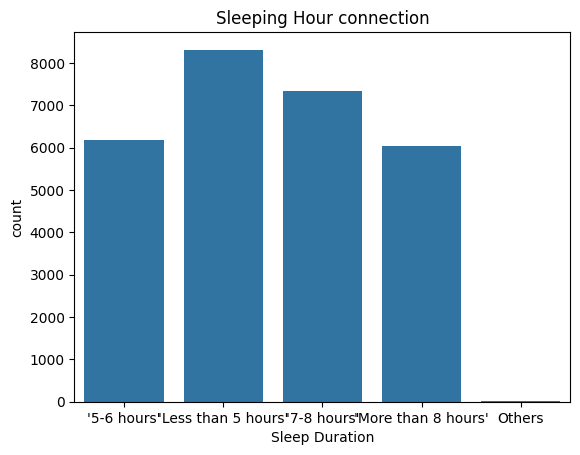

In [85]:
sns.countplot(x=df['Sleep Duration'],data=df)
plt.title('Sleeping Hour connection')

<Axes: ylabel='Age'>

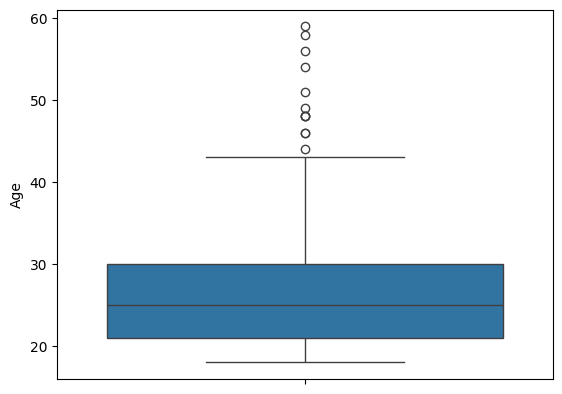

In [86]:
sns.boxplot(df['Age'])

In [87]:
data=df['Age'].mode()[0]
for i in df.index:
  if df.loc[i,'Age']>45:
    df.loc[i,'Age']=data

In [88]:
df.drop('id',axis=1,inplace=True)

In [89]:
X = df.drop(columns=["Depression"])
y = df["Depression"]


In [90]:
numerical_features = [
    "Age",
    "Academic Pressure",
    "Work Pressure",
    "CGPA",
    "Study Satisfaction",
    "Job Satisfaction",
    "Work/Study Hours"
]

categorical_features = [
    "Gender",
    "City",
    "Profession",
    "Sleep Duration",
    "Dietary Habits",
    "Degree",
    "Have you ever had suicidal thoughts ?",
    "Financial Stress",
    "Family History of Mental Illness"
]


In [91]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [93]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", probability=True))
])


In [94]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [95]:


y_pred = pipeline.predict(X_test)
print("Pipeline Accuracy:", accuracy_score(y_test, y_pred))


Pipeline Accuracy: 0.8426805232037269


In [96]:

joblib.dump(pipeline, "depression_pipeline.pkl")


['depression_pipeline.pkl']